In [1]:
# Making viz with seaborn
# Load library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import PIL
import requests
import seaborn as sns

In [2]:
# Loading smaple data
tips = sns.load_dataset("tips")
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


<Axes: xlabel='total_bill', ylabel='tip'>

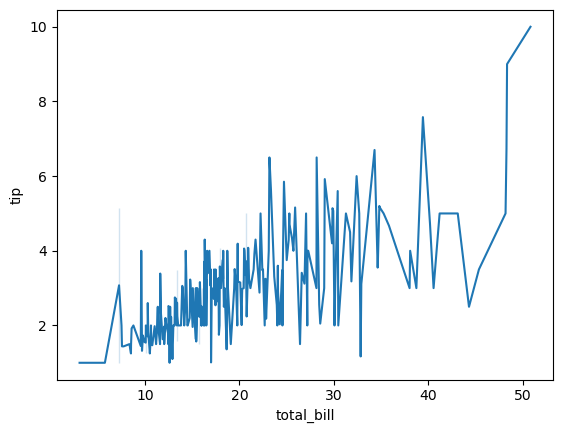

In [5]:
# basic plot

sns.lineplot(data=tips, x='total_bill', y='tip')

<Axes: xlabel='total_bill', ylabel='tip'>

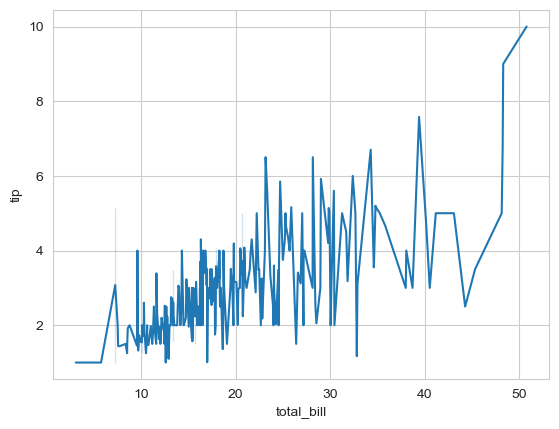

In [7]:
# change style to premade
sns.set_style('whitegrid')
sns.lineplot(data=tips, x='total_bill', y='tip')

[Text(0.5, 1.0, 'Tips vs Total Bill'),
 Text(0.5, 0, 'Total Bill($)'),
 Text(0, 0.5, 'Tips Amount($)')]

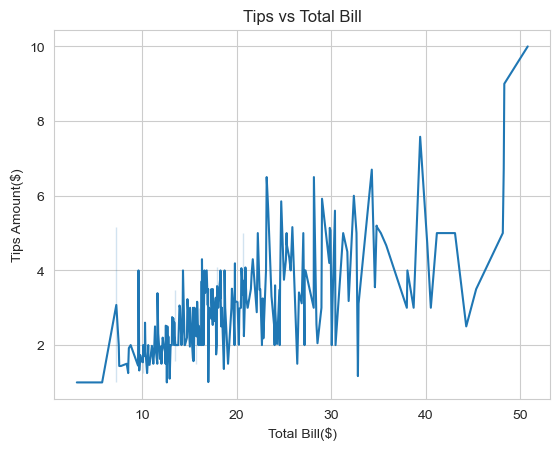

In [8]:
#add title and axis labels
tipgraph = sns.lineplot(data=tips, x='total_bill', y='tip')
tipgraph.set(title='Tips vs Total Bill',
             xlabel='Total Bill($)',
             ylabel='Tips Amount($)')



[Text(0.5, 1.0, 'Tips vs Total Bill'),
 Text(0.5, 0, 'Total Bill($)'),
 Text(0, 0.5, 'Tips Amount($)')]

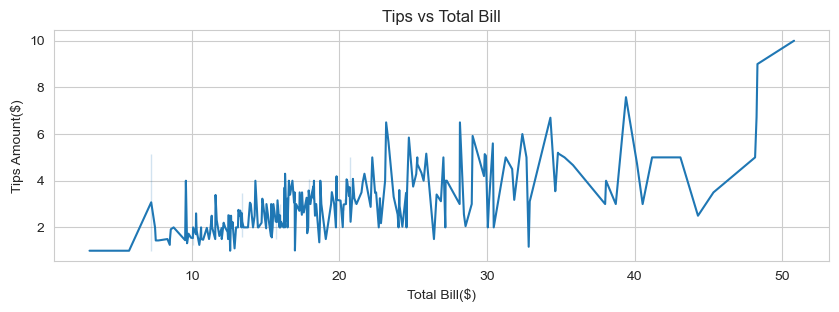

In [10]:
# modify the size
fig = plt.subplots(figsize=(10,3))
tipgraph = sns.lineplot(data=tips, x='total_bill', y='tip')
tipgraph.set(title='Tips vs Total Bill',
             xlabel='Total Bill($)',
             ylabel='Tips Amount($)')

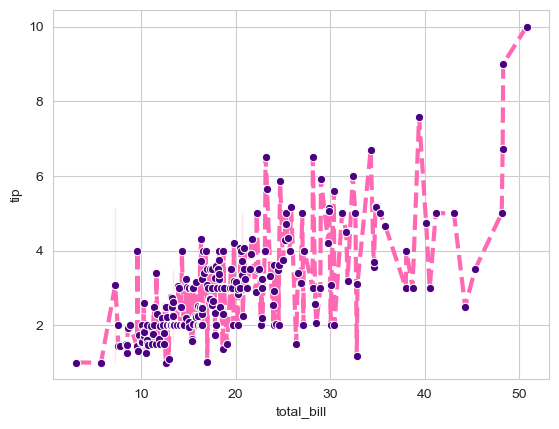

In [11]:
# more modification

tipgraph = sns.lineplot(data=tips,
x='total_bill',
y='tip',
color = 'hotpink',
linestyle = '--',
linewidth = 3,
marker = 'o',
markerfacecolor = 'indigo')

[Text(0.5, 1.0, 'Tips vs. Total Bill'),
 Text(0.5, 0, 'Total Bill ($)'),
 Text(0, 0.5, 'Tip Amount ($)')]

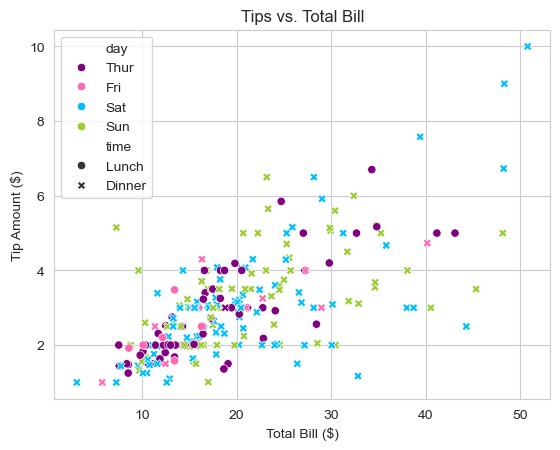

In [13]:
#multiple variables

tipgraph = sns.scatterplot(data=tips, x='total_bill',
y='tip', style = 'time', hue =
'day', palette = ['purple',
'hotpink', 'deepskyblue',
'yellowgreen'])
tipgraph.set(title='Tips vs. Total Bill',
xlabel='Total Bill ($)',
ylabel='Tip Amount ($)')

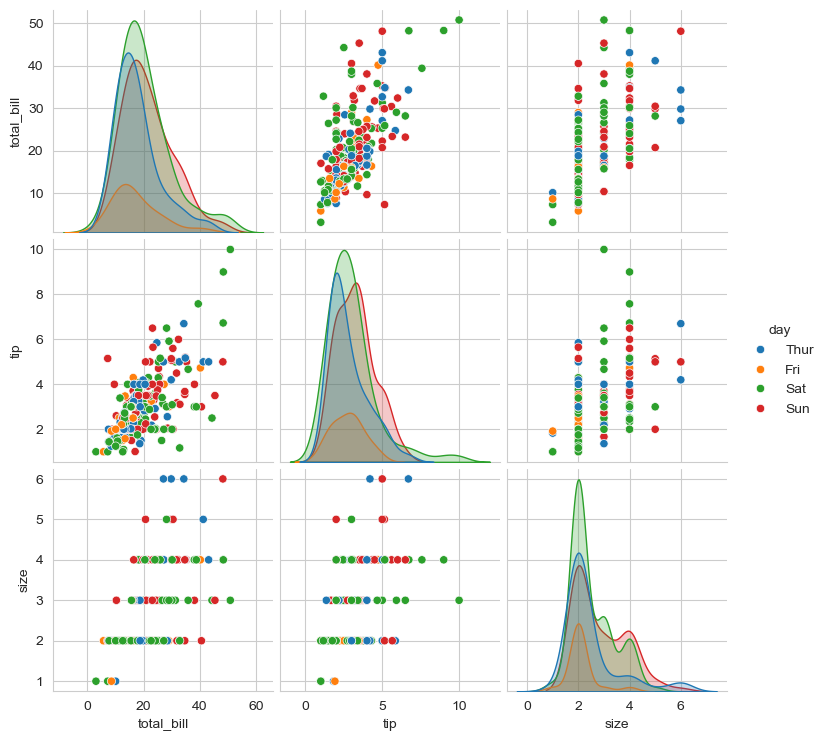

In [14]:
#pairplot

sns.pairplot(
data = tips,
hue = 'day')

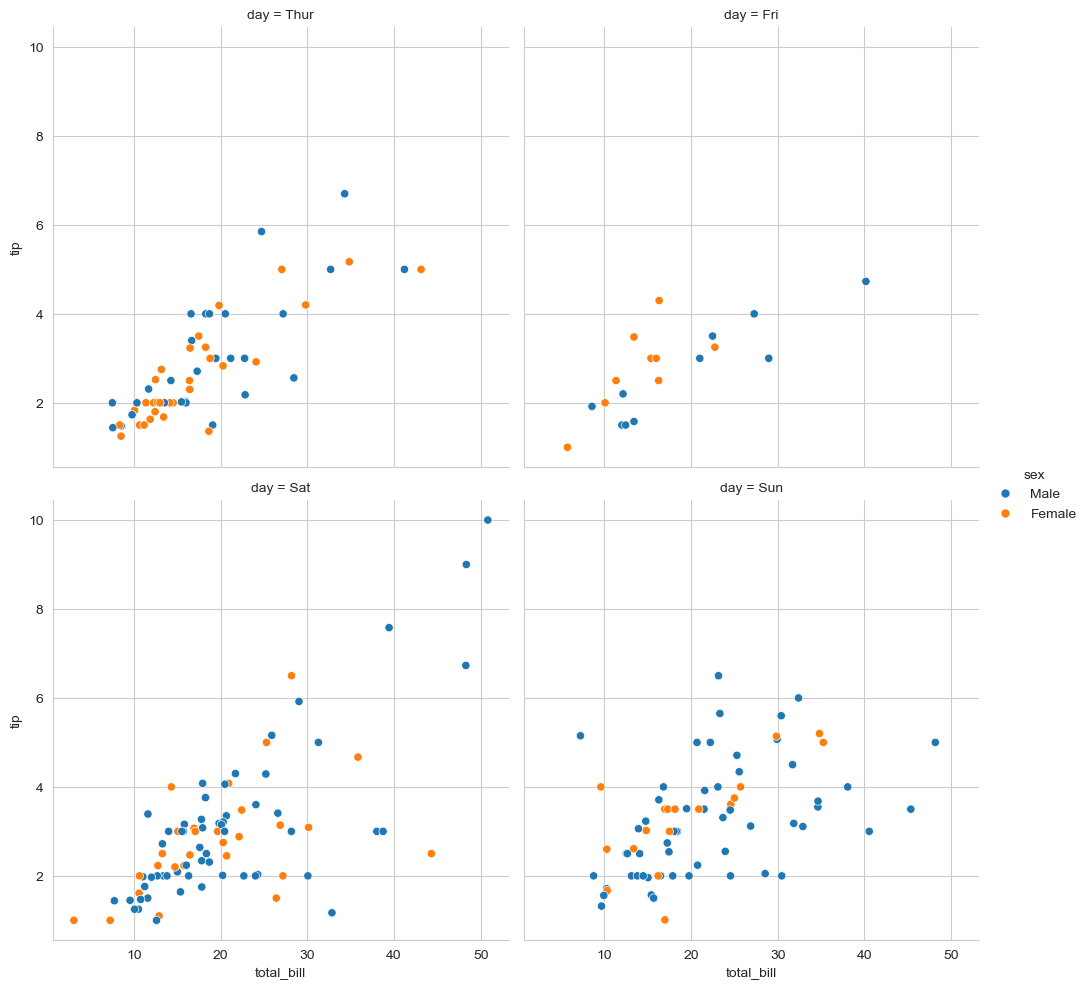

In [15]:
#replot

daysplot = sns.relplot(
data=tips,
x="total_bill", #change x axis
y="tip", # change Y axis
hue="sex", #shows male vs female
col="day", #make the day as the only column
kind="scatter", # set all plot in scatter plots
col_wrap=2)

Activity:

1. First figure shows the difference between genders overall. Second shows the difference in different subjects.
2. first is very clear. Second is more detailed that audiences can only view interested subjects. 

In [16]:
import plotly.graph_objects as go # 'go' is 'graph objects’
x1 = np.array(["Luffy", "Zoro", "Nami", "Usopp", "Sanji"])
y1 = np.array([110, 180, 240, 99, 220])

In [17]:
#make the figure and set it as bar fig
graph = go.Figure()
graph.add_trace(go.Bar(x=x1, y=y1))

In [18]:
# add titles and show it
graph.update_layout(
title="Pirate Scores",
xaxis_title="Pirates",
yaxis_title="Score")
graph.show()

In [19]:
graph = go.Figure()
graph.add_trace(go.Line(x=x1, y=y1, mode='markers', # we want points for a line plot
marker=dict(
size=15, # point size
color='hotpink', # point colour
opacity=1, # point transparency/alpha
line=dict(width=5, color='purple') # point outline
)))
graph.update_layout(
title='Interactive Pirate Plot',
xaxis_title='Pirates',
yaxis_title='Scores',
width=500, height=500)

c:\Users\q1157\anaconda3\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [28]:
!pip install wordcloud

In [29]:
#try worldcloud

from wordcloud import WordCloud
df = pd.read_csv("https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/movie_quotes.csv",
on_bad_lines='skip')
df

,quote,movie,type,year
0,"Do, or do not. There is no try.",Star Wars: Episode V - The Empire Strikes Back,movie,1890
1,Listen to them. Children of the night. What mu...,Dracula,movie,1931
2,It's alive! It's alive!,Frankenstein,movie,1931
3,"Oh, no, it wasn't the airplanes. It was Beauty...",King Kong,movie,1933
4,"Magic Mirror on the wall, who is the fairest o...",Snow White and the Seven Dwarves,movie,1937
...,...,...,...,...
727,I didn't know if you were lost. Stick with me....,Us,movie,2019
728,This guy's awesome! He's holding his own while...,Dragon Ball Super: Broly,movie,2019
729,"Murder is murder, it don’t matter who you are.",Black and Blue,movie,2019
730,You know what a lion is? A lion is a strong an...,Between Two Ferns: The Movie,movie,2019


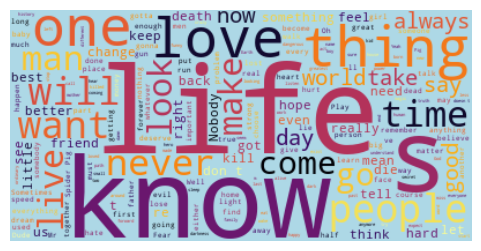

In [31]:
# join all our text from each row from our quote column into a string
text = " ".join(each for each in df.quote)
# generate our wordcloud image
wordcloud = WordCloud(background_color="lightblue",
colormap = 'inferno').generate(text)
# use matplotlib syntax to put our image in a figure
fig, ax = plt.subplots(figsize=(7, 3))
ax.imshow(wordcloud, # remember 'imshow' from when we added pictures to our matplotlib axes
interpolation='bilinear') # this line helps smooth our image
ax.axis("off")
plt.show()

In [34]:
!pip install matplotlib_venn

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for matplotlib_venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45438 sha256=e1497a7bb4b7c69690cf5f7605adf19177907eddeeb33590f011bf9ac10b5c89
  Stored in directory: c:\users\q1157\appdata\local\pip\cache\wheels\c2\47\0c\f014c55a1cfd56dce41a1cafd23e3c590652b5e71330cc181c
Successfully built matplotlib_venn


In [35]:
# try venn diagrams
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
# define the sample set
A = set(["apple", "banana", "watermelon"])
B = set(["pumpkin", "blueberry", "apple", "key lime"])

c:\Users\q1157\anaconda3\Lib\site-packages\matplotlib_venn\_util.py:32: UserWarning:

venn2_unweighted is deprecated. Use venn2 with the appropriate layout_algorithm instead.



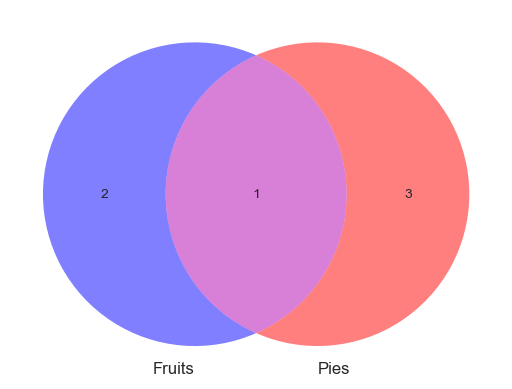

In [36]:
#draw it
diagram = venn2_unweighted([A, B],
set_labels = ('Fruits', 'Pies'),
set_colors=("blue", "red"),
alpha=0.5)
plt.show()

c:\Users\q1157\anaconda3\Lib\site-packages\matplotlib_venn\_util.py:32: UserWarning:

venn2_unweighted is deprecated. Use venn2 with the appropriate layout_algorithm instead.



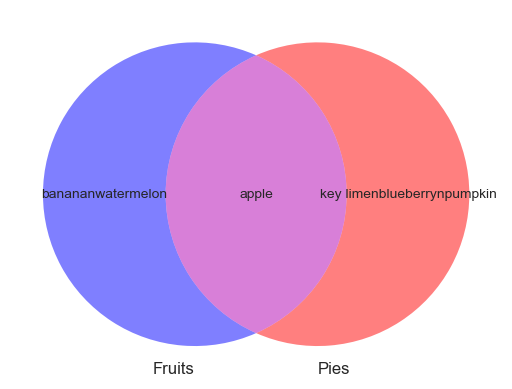

In [40]:
#label them
diagram = venn2_unweighted([A, B],
set_labels = ('Fruits', 'Pies'),
set_colors=("blue", "red"),
alpha=0.5)
diagram.get_label_by_id("10").set_text("n".join(A - B))

diagram.get_label_by_id("11").set_text("n".join(A & B))

diagram.get_label_by_id("01").set_text("n".join(B - A))

plt.show()